# Logistic Regression

A machine learning problem I would like to solve using Logistic Regression is to predict the income of someone based on factors in their life that can lead to insight on how much money they make. 


### Dataset selection

It was difficult to find a good dataset that could be used with logistic regression, as the nature of the problem is not likley to produce linearlly seperable or close to it data, since there are a high vareity of factors that lead to someones income. Also good data is hard to find, since it involes very personal data, and many public datasets are estimates of how many people fall under each categories.

Eventually I used the Census Income data set from the UCI dataset website, which is a very popular dataset that lists certain attributes of people, and whether they make <=50K or >50K.

### Exploratory Data Analysis

To look into how well the data would work for this problem, and to try and select reasonalble features, I used matplotlib to plot distributions of two different parameter, to try and find some visual trends that could be solved using logistic regression. I knew that age would be one of the features, so I plotted it against a number of different parameters in the dataset and found that Hours Worked produced data that most resembled two distinct groups. 

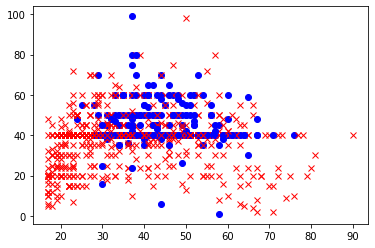

In [1]:
import matplotlib.pyplot as plt

file = open('adult.data')
lines = file.readlines()
age, hours, income = [], [], []
for i in range(1000):
    age.append(int(lines[i].strip().split(',')[0]))
    hours.append(int(lines[i].strip().split(',')[12]))
    income.append(lines[i].strip().split(',')[-1])
    
for i in range(1000):
    if income[i] == ' <=50K':
        plt.plot(age[i], hours[i], 'rx')
    else:
        plt.plot(age[i], hours[i], 'bo')
plt.show()

The dataset has no missing values, so I don't need to worry about that issue with this problem. Unfortunatley, there seems to be an outlier problem, but there is not much I can do to curb that besides indivdually removing data points. 

# Implementation

In [2]:
# Read processed data and form X and Y matrices
import numpy as np
f = open('adult.data')
lines = f.readlines()[:-1]
#np.random.shuffle(lines)
X, Y = [], []
#for i in range(len(lines)):
for i in range(1000):
    l = lines[i].strip().split(',')
    X.append([1, float(l[0]), float(l[12])])
    if l[-1] == ' <=50K':
        Y.append(-1.0)
    else:
        Y.append(1.0)
X, Y = np.array(X), np.array(Y)


In [3]:
# Split into training and test data
# Because we randomized the lines when we read them in,
# we can just select the first values of the data arrays, and have X and Y match
x_test, x_train = X[0:int(0.2*len(X))], X[int(0.2*len(X))+1:]
y_test, y_train = Y[0:int(0.2*len(Y))], Y[int(0.2*len(Y))+1:]

In [4]:
import math

def loss(X, Y, w):
    steps = 0
    for i in range(len(Y)):
        steps += (Y[i] * X[i]) / (1 + (math.e ** (Y[i] * np.dot(w, X[i]))))
    gradient = - 1.0 / len(Y) * steps
    return gradient

def update(w, dw, r):
    return w - (r * dw)

def error(X, Y, w):
    e_in = 0.0
    for i in range(len(Y)):
        e_in += np.log(1.0 + math.e ** (-1.0 * Y[i] * np.dot(w.T, X[i].T)))
    return e_in / len(Y)


In [5]:
# Vanilla Gradient Descent

import random
weights = np.array([random.uniform(-2.0, 2.0), random.uniform(-2.0, 2.0), random.uniform(-2.0, 2.0)])
best_e, best_w = 1000000000, [] 
rate = 0.001
for i in range(10000):
    dw = loss(x_train, y_train, weights)
    weights = update(weights, dw, rate)
    e_in = error(x_train, y_train, weights)
    if i % 1000 == 0:
        print("Iteration", i, "Test Error:", e_in)
    if e_in < best_e:
        best_e = e_in
        best_w = weights
weights = best_w
print(weights)
print(best_e)

Iteration 0 Test Error: 15.999716989052144
Iteration 1000 Test Error: 0.6115567848970731
Iteration 2000 Test Error: 0.6089354617399386
Iteration 3000 Test Error: 0.6063737229465288
Iteration 4000 Test Error: 0.6038703062761925
Iteration 5000 Test Error: 0.6014239601193824
Iteration 6000 Test Error: 0.5990334447275852
Iteration 7000 Test Error: 0.596697533347809
Iteration 8000 Test Error: 0.5944150132609537
Iteration 9000 Test Error: 0.5921846867263569
[ 0.13319648 -0.0120579  -0.01619075]
0.5900075260590594


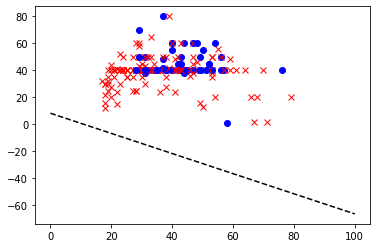

In [6]:
y0, y1 = (-weights[1] / weights[2]) * 0 - (weights[0] / weights[2]), (-weights[1] / weights[2]) * 100 - (weights[0] / weights[2])
plt.plot([0, 100], [y0, y1], 'k--')
for i in range(len(x_test)):
    plt.plot(x_test[i][1], x_test[i][2], 'rx' if Y[i] == -1.0 else 'bo')

plt.show()

In [8]:
# Gradient Descent with adaptive learning rate

weights = np.array([random.uniform(-2.0, 2.0), random.uniform(-2.0, 2.0), random.uniform(-2.0, 2.0)])
best_e, best_w = 1000000000, [] 
rate = 0.1
for i in range(10000):
    dw = loss(x_train, y_train, weights)
    weights = update(weights, dw, rate)
    e_in = error(x_train, y_train, weights)
    if e_in > best_e:
        weights = update(weights, -1 * dw, rate)
        rate = rate * 0.9
    if i % 1000 == 0:
        print("Iteration", i, "Test error:", e_in, "Learning rate:", rate)
    if e_in < best_e:
        best_e = e_in
        best_w = weights
weights = best_w

Iteration 0 Test error: 47.32573777427825 Learning rate: 0.1
Iteration 1000 Test error: 0.597537902073964 Learning rate: 0.0030903154382632653
Iteration 2000 Test error: 0.5905933256705923 Learning rate: 0.0030903154382632653
Iteration 3000 Test error: 0.5841279238414345 Learning rate: 0.0030903154382632653
Iteration 4000 Test error: 0.5781082374312343 Learning rate: 0.0030903154382632653
Iteration 5000 Test error: 0.5725025099391362 Learning rate: 0.0030903154382632653
Iteration 6000 Test error: 0.5672807795886176 Learning rate: 0.0030903154382632653
Iteration 7000 Test error: 0.5624149200505305 Learning rate: 0.0030903154382632653
Iteration 8000 Test error: 0.5578786398182072 Learning rate: 0.0030903154382632653
Iteration 9000 Test error: 0.553647449445719 Learning rate: 0.0030903154382632653


In [9]:
# Gradient Descent with momentum

def update_m(w, dw, r, m):
    return w - (0.5 * m + r * dw)
weights = np.array([random.uniform(-2.0, 2.0), random.uniform(-2.0, 2.0), random.uniform(-2.0, 2.0)])
best_e, best_w = 1000000000, [] 
rate = 0.001
for i in range(5000):
    dw = loss(x_train, y_train, weights)
    prev_w = weights
    weights = update_m(weights, dw, rate, prev_w)
    e_in = error(x_train, y_train, weights)
    if i % 500 == 0:
        print("Iteration", i, "Test Error:", e_in)
    if e_in < best_e:
        best_e = e_in
        best_w = weights
weights = best_w

Iteration 0 Test Error: 2.2040588445105693
Iteration 500 Test Error: 0.6025097601677215
Iteration 1000 Test Error: 0.6025097601677215
Iteration 1500 Test Error: 0.6025097601677215
Iteration 2000 Test Error: 0.6025097601677215
Iteration 2500 Test Error: 0.6025097601677215
Iteration 3000 Test Error: 0.6025097601677215
Iteration 3500 Test Error: 0.6025097601677215
Iteration 4000 Test Error: 0.6025097601677215
Iteration 4500 Test Error: 0.6025097601677215


In hindsight, better data could have been selected to use a logistic regression model on, as there was not much linear separation. I even tested with sklearn's logistic regression model and it only acheived a 0.77 accuracy on the data. 

The vanilla gradient descent algorithm seemed to take a long time to converge and it was hard to find a learning rate that gave decent results. I found that in practice the adaptive learning rate gradient descent converged in better time and allowed for the model to find the learning rate on its own. The momentum model seemed to fall into a local minimum trap, where it followed a path too far, instead of finding the overall minimum.